<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Pyhton/Assignments/ML_Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on a machine learning project using data from the UCI Machine Learning Repository.

In [39]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [40]:
# Reading in data
data = pd.read_csv('https://raw.githubusercontent.com/CelesTech03/ML-Data/main/diabetic_data.csv')

In [41]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [42]:
ID = pd.read_csv('https://raw.githubusercontent.com/CelesTech03/ML-Data/main/IDs_mapping.csv')

In [43]:
ID.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [44]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [46]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [47]:
# Isolating medications columns
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [48]:
# Converting medications columns into boolean variables
data[medications[0]].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [49]:
# Looping through all medications and converting each column to boolean
# All instances of 'No' turn to - and everything else to 1
for m in medications:
    data[f'{m}_bool'] = np.where(data[m]=='No', 0, 1)
    data = data.drop(columns=m)

In [50]:
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [51]:
# Converting all instances of 'NO' to 0 and everything else to 1
data['readmitted_bool'] = np.where(data['readmitted']=='NO', 0, 1)
data['readmitted_bool'].value_counts()

0    54864
1    46902
Name: readmitted_bool, dtype: int64

#Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split

In [71]:
# Defining X and Y variables to prepare for predictive models
med_features = ['metformin_bool', 'repaglinide_bool',
    'nateglinide_bool', 'chlorpropamide_bool', 'glimepiride_bool',
    'acetohexamide_bool', 'glipizide_bool', 'glyburide_bool',
    'tolbutamide_bool', 'pioglitazone_bool', 'rosiglitazone_bool',
    'acarbose_bool', 'miglitol_bool', 'troglitazone_bool',
    'tolazamide_bool', 'examide_bool', 'citoglipton_bool', 'insulin_bool',
    'glyburide-metformin_bool', 'glipizide-metformin_bool',
    'glimepiride-pioglitazone_bool', 'metformin-rosiglitazone_bool',
    'metformin-pioglitazone_bool']

other_features = ['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']

all_features = med_features + other_features

X = data[all_features]
y = data['readmitted_bool']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Calculating and transforming our train data
X_train = sc.fit_transform(X_train)
# Calculating and transforming our test data
X_test = sc.transform(X_test)

In [74]:
# Import KNN Classfiier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Setting KNN Classifier to nearest neighbors 1 and saving it to knn var
knn = KNeighborsClassifier(n_neighbors = 1)

In [76]:
# Fitting a model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
# Running predictions on X_test (testing data)
predict = knn.predict(X_test)

In [78]:
# Prints array of predictions
predict

array([1, 1, 0, ..., 0, 0, 1])

#Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58     16453
           1       0.51      0.49      0.50     14077

    accuracy                           0.55     30530
   macro avg       0.54      0.54      0.54     30530
weighted avg       0.55      0.55      0.55     30530



In [81]:
print(confusion_matrix(y_test,predictions))

[[9714 6739]
 [7115 6962]]


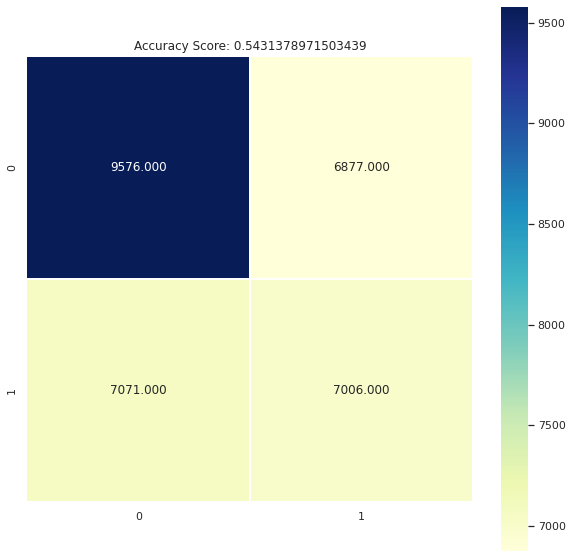

In [82]:
# Plotting confusion matrix for better interpretation
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths= .5, square = True, cmap = 'YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 12);

#Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
rfc_pred = rfc.predict(X_test)

In [85]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [86]:
print(confusion_matrix(y_test,rfc_pred))

[[10433  6020]
 [ 6796  7281]]


In [87]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62     16453
           1       0.55      0.52      0.53     14077

    accuracy                           0.58     30530
   macro avg       0.58      0.58      0.58     30530
weighted avg       0.58      0.58      0.58     30530

